# <center> **Hotel Reservations** </center>
### **Giới thiệu bộ dữ liệu:**
- Hiện nay có rất nhiều kênh đặt phòng khách sạn trực tuyến, nó khiến cho việc đặt phòng trở nên dễ dàng hơn. Nhưng cũng chính vì thế việc hủy đặt phòng cũng dễ dàng. Những lý do chính cho việc hủy bỏ là thay đổi kế hoạch, xung đột lịch trình,...Việc hủy bỏ làm ảnh hưởng xấu đến doanh thu của khách sạn. 
- Mục tiêu của bộ dữ liệu này là dự đoán xem khách hàng có thể hủy bỏ phòng hay không?. Để khách sạn có kế hoạch chủ động hơn, tối ưu doanh thu cho khách sạn.
- Bộ dữ liệu bao gồm 19 đặc trưng thông tin chi tiết của khách đặt phòng:
  - **Booking_ID**: đinh danh cá nhân mỗi lần đặt phòng
  - **no_of_adults**: Số lượng người lớn
  - **no_of_children**: Số lượng trẻ em
  - **no_of_weekend_nights**: Số đêm cuối tuần (T7, CN), khách ở lại hoặc đã đặt chỗ.
  - **no_of_week_nights**: Số đêm trong tuần (T2 - T6), khách ở lại hoặc đã đặt chỗ.
  - **type_of_meal_plan**: Loại kế hoạch bữa ăn được đặt bởi khách hàng.
  - **required_car_parking_space**: Khách hàng có yêu cầu chỗ đặt xe hơi hay không? (0 - No, 1 - Yes)
  - **room_type_reserved**: Loại phòng khách hàng đặt
  - **lead_time**: Số ngày giữa ngày đặt phòng và ngày đến.
  - **arrival_year**: Năm đến.
  - **arrival_month**: Tháng đến.
  - **arrival_date**: Ngày đến.
  - **market_segment_type**: Loại phân khúc thị trường.
  - **repeated_guest**: Có phải là khách cũ hay không? (0 - No, 1 - Yes)
  - **no_of_previous_cancellations**: Số lượng đặt phòng trước đó đã bị khách hàng hủy bỏ trước khi đặt phòng hiện tại.
  - **no_of_previous_bookings_not_canceled**: Số lượng đặt phòng trước đó không bị khách hàng hủy bỏ trước khi đặt phòng hiện tại.
  - **avg_price_per_room**: Giá trung bình mỗi ngày đặt phòng, giá phòng là linh động.
  - **no_of_special_requests**: Số lượng yêu cầu đặc biệt của khách hàng (VD: tầng trên cao, view biển,...).
  - **booking_status**: Trạng thái cho biết phòng đó bị hủy hay không?

- Nguồn dữ liệu:  **[Kaggle](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset)**


### **Thư viện sử dụng:**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **Đọc dữ liệu:**

In [ ]:
df = pd.read_csv("/content/Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### **Thống kê mô tả:**

In [ ]:
df.shape

(36275, 19)

Dữ liệu gồm 19 cột và 36275 dòng

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

19 đặc trưng bao gồm:
  - 14 đặc trưng dạng numerical
  - 5 đặc trưng dạng categorical

In [ ]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Không có giá trị thiếu

In [ ]:
print("Số lượng dòng trùng lặp:", df.duplicated().sum())

Số lượng dòng trùng lặp: 0


Sau khi hiểu rõ thông tin từng đặc trưng thì các đặc trưng dạng phân loại là:

In [ ]:
categorical_features = ['Booking_ID',
                  'type_of_meal_plan',
                  'room_type_reserved',
                  'market_segment_type',
                  'booking_status',
                  'required_car_parking_space',
                  'arrival_year', 'arrival_month', 'arrival_date',
                  'repeated_guest']

In [ ]:
df[categorical_features].head()

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status,required_car_parking_space,arrival_year,arrival_month,arrival_date,repeated_guest
0,INN00001,Meal Plan 1,Room_Type 1,Offline,Not_Canceled,0,2017,10,2,0
1,INN00002,Not Selected,Room_Type 1,Online,Not_Canceled,0,2018,11,6,0
2,INN00003,Meal Plan 1,Room_Type 1,Online,Canceled,0,2018,2,28,0
3,INN00004,Meal Plan 1,Room_Type 1,Online,Canceled,0,2018,5,20,0
4,INN00005,Not Selected,Room_Type 1,Online,Canceled,0,2018,4,11,0


Các giá trị trong cột Categorical

In [ ]:
for col in df[categorical_features].columns:
    print('{} : {}'.format(col,df[col].unique()))

Booking_ID : ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
type_of_meal_plan : ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
room_type_reserved : ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market_segment_type : ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
booking_status : ['Not_Canceled' 'Canceled']
required_car_parking_space : [0 1]
arrival_year : [2017 2018]
arrival_month : [10 11  2  5  4  9 12  7  6  8  3  1]
arrival_date : [ 2  6 28 20 11 13 15 26 18 30  5 10  4 25 22 21 19 17  7  9 27  1 29 16
  3 24 14 31 23  8 12]
repeated_guest : [0 1]


Các đặt trưng dạng Numerical:

In [ ]:
numerical_features = [feature for feature in list(df.columns) if feature not in categorical_features]
numerical_features

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'lead_time',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [ ]:
df[numerical_features].head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,224,0,0,65.00,0
1,2,0,2,3,5,0,0,106.68,1
2,1,0,2,1,1,0,0,60.00,0
3,2,0,0,2,211,0,0,100.00,0
4,2,0,1,1,48,0,0,94.50,0


Tính toán giá trị: Mean, Standard Deviation, Min, Max

In [ ]:
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
no_of_previous_cancellations,36275.0,0.023349,0.368331,0.0,0.0,0.00,0.0,13.0
no_of_previous_bookings_not_canceled,36275.0,0.153411,1.754171,0.0,0.0,0.00,0.0,58.0
avg_price_per_room,36275.0,103.423539,35.089424,0.0,80.3,99.45,120.0,540.0
no_of_special_requests,36275.0,0.619655,0.786236,0.0,0.0,0.00,1.0,5.0


### **Trực quan hóa dữ liệu**

#### **1. Biến phân loại**

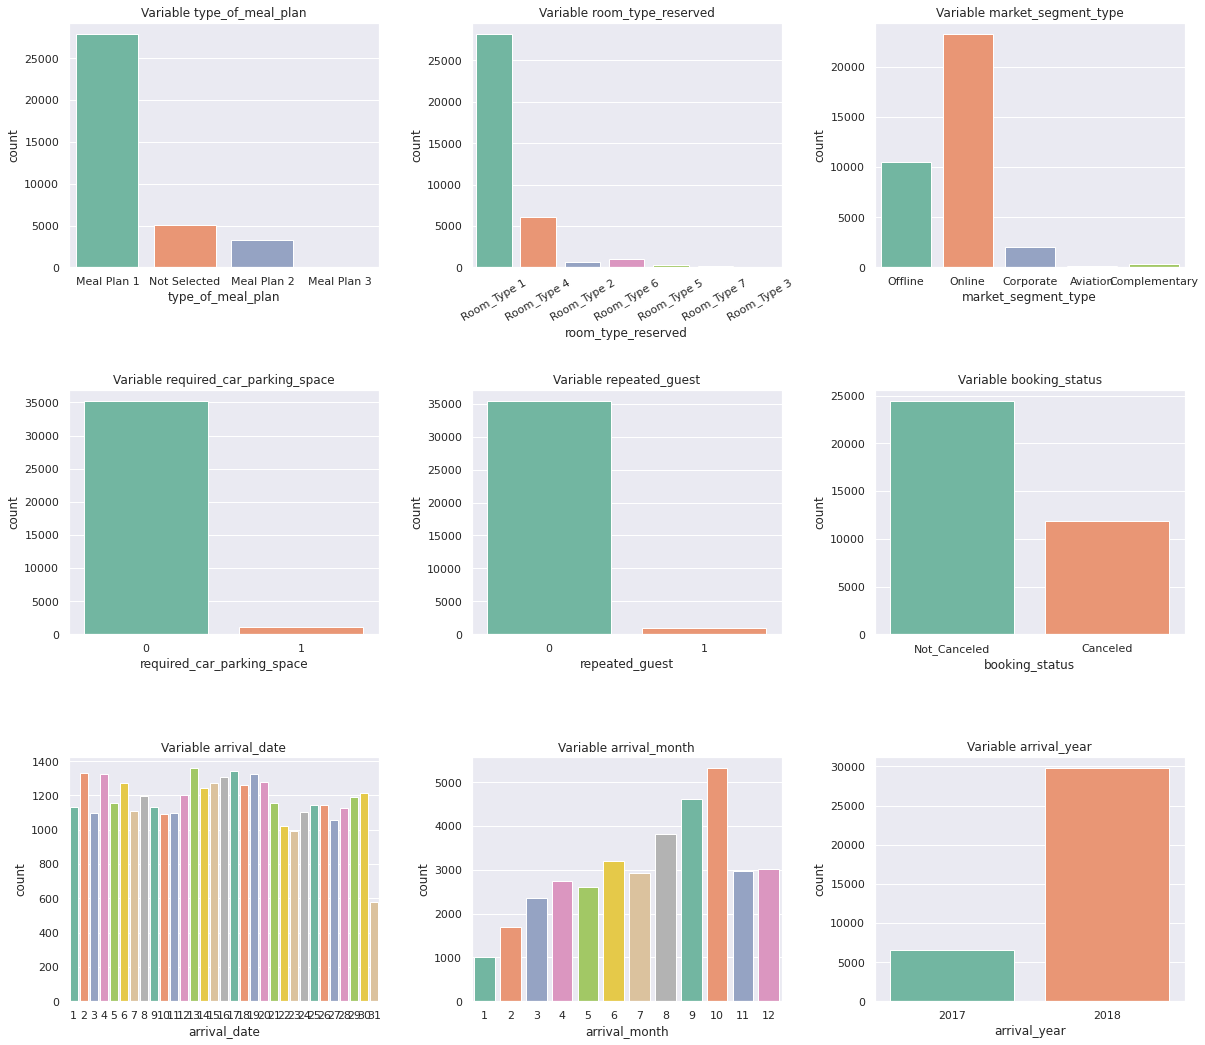

In [ ]:
plt.figure(figsize = (20,18))

plt.subplot(3,3,1)
plt.gca().set_title('Variable type_of_meal_plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(3,3,2)
plt.gca().set_title('Variable room_type_reserved')
plt.xticks(rotation=30)
sns.countplot(x = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(3,3,3)
plt.gca().set_title('Variable market_segment_type')
sns.countplot(x = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(3,3,4)
plt.gca().set_title('Variable required_car_parking_space')
sns.countplot(x = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(3,3,5)
plt.gca().set_title('Variable repeated_guest')
sns.countplot(x = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(3,3,6)
plt.gca().set_title('Variable booking_status')
sns.countplot(x = 'booking_status', palette = 'Set2', data = df)

plt.subplot(3,3,7)
plt.gca().set_title('Variable arrival_date')
sns.countplot(x = 'arrival_date', palette = 'Set2', data = df)

plt.subplot(3,3,8)
plt.gca().set_title('Variable arrival_month')
sns.countplot(x = 'arrival_month', palette = 'Set2', data = df)

plt.subplot(3,3,9)
plt.gca().set_title('Variable arrival_year')
sns.countplot(x = 'arrival_year', palette = 'Set2', data = df)


plt.subplots_adjust(wspace=0.3,hspace=0.5)
plt.show();

#### **<u>Nhận xét</u>**:
- Gói ăn uống phổ biến: gói 1 hoặc không chọn 
- Kiểu phòng được đặt phổ biến: loại 1, loại 4
- Kiểu đặt phòng phổ biến: Online, Offline, khách công ty,...
- Đa số khách không yêu cầu vị trí đỗ xe.
- Đa số khách đặt phòng lần đầu.
- Số lượng đặt phòng tăng từ tháng 1 đến tháng 10. Hai tháng cuối năm có xu hướng đặt phòng giảm.


In [ ]:
df_Canceled = df[df.booking_status == 'Canceled']
df_notCanceled = df[df.booking_status == 'Not_Canceled']

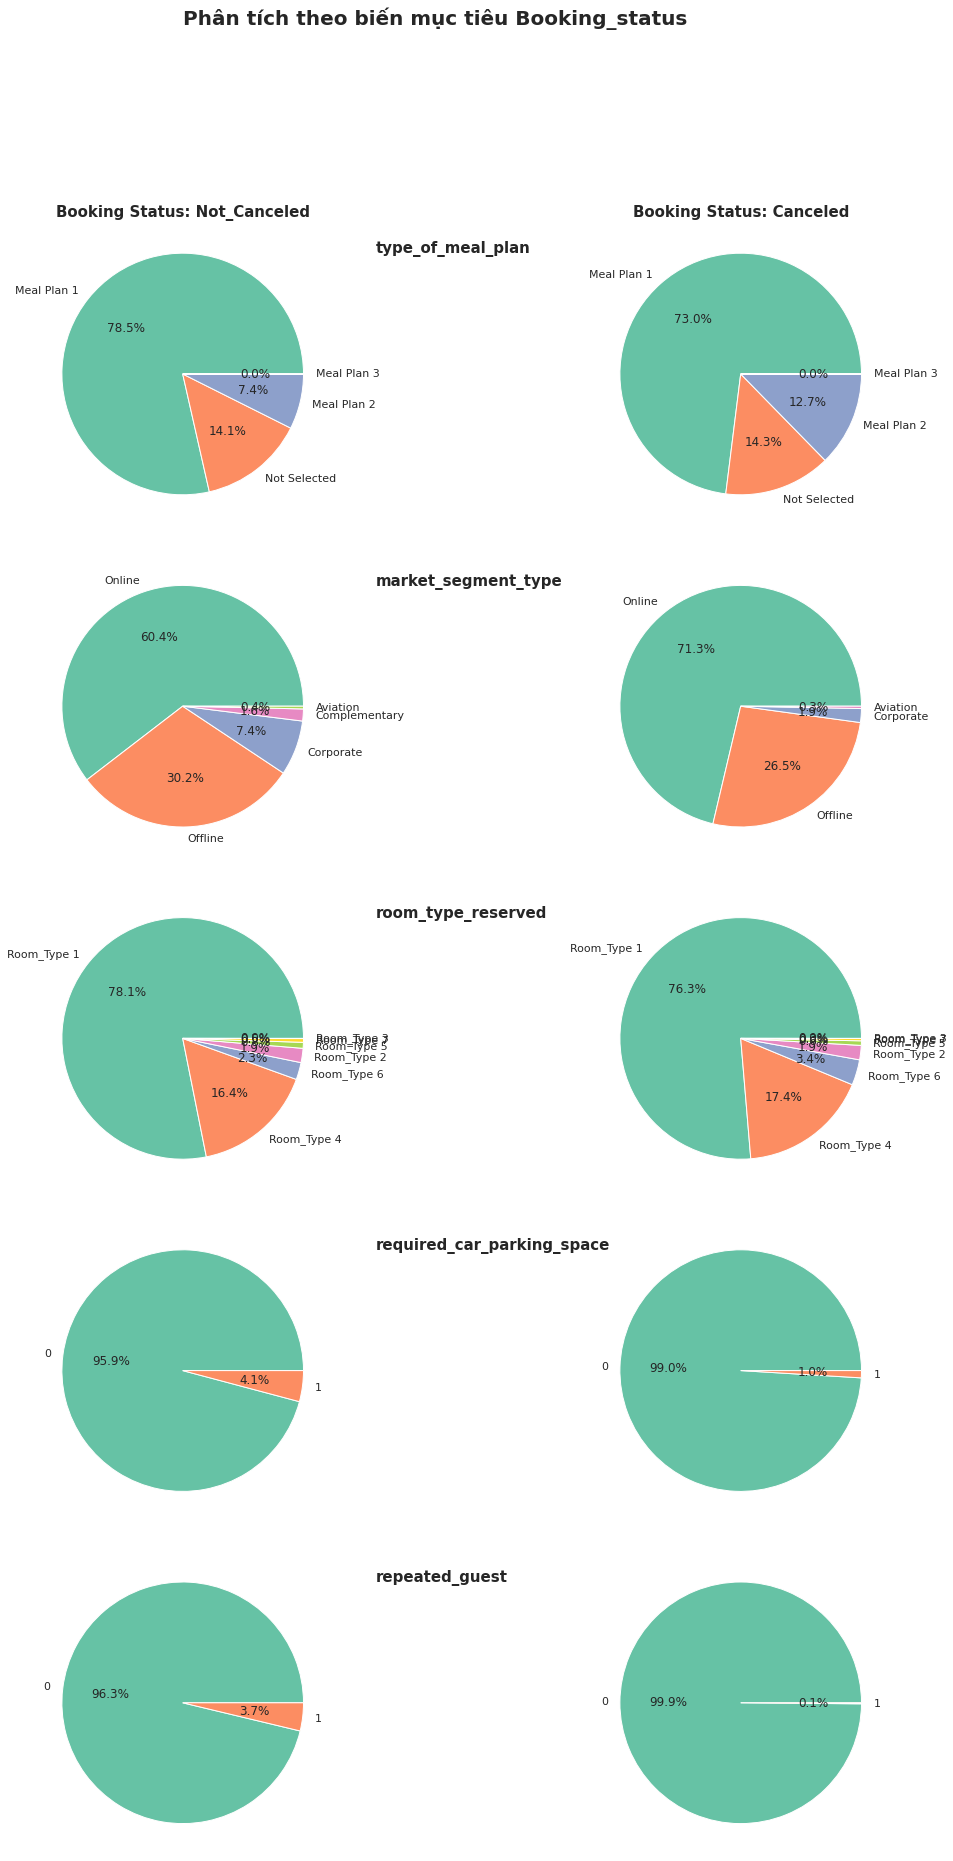

In [ ]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%'.format(pct, v=val)
        return my_format
plt.figure(figsize = (30, 30))
plt.suptitle("Phân tích theo biến mục tiêu Booking_status",fontweight="bold", fontsize=20)

colors_list = sns.color_palette('Set2');

data0 = df_notCanceled['type_of_meal_plan'].value_counts()
data1 = df_Canceled['type_of_meal_plan'].value_counts()
plt.subplot(5,2,1)
plt.title(label='Booking Status: Not_Canceled',fontweight = 'bold',fontsize = 15);
plt.pie(data0,labels = data0.index, colors=colors_list, autopct=autopct_format(data0))
plt.text(1.6,1,"type_of_meal_plan",fontweight = 'bold',fontsize = 15)
plt.subplot(5,2,2)
plt.title(label='Booking Status: Canceled',fontweight = 'bold',fontsize = 15);
plt.pie(data1,labels = data1.index, colors=colors_list, autopct=autopct_format(data1))

data0 = df_notCanceled['market_segment_type'].value_counts()
data1 = df_Canceled['market_segment_type'].value_counts()
plt.subplot(5,2,3)
plt.pie(data0,labels = data0.index, colors=colors_list, autopct=autopct_format(data0))
plt.text(1.6,1,"market_segment_type",fontweight = 'bold',fontsize = 15)
plt.subplot(5,2,4)
plt.pie(data1,labels = data1.index, colors=colors_list, autopct=autopct_format(data1))

data0 = df_notCanceled['room_type_reserved'].value_counts()
data1 = df_Canceled['room_type_reserved'].value_counts()
plt.subplot(5,2,5)
plt.pie(data0,labels = data0.index, colors=colors_list, autopct=autopct_format(data0))
plt.text(1.6,1,"room_type_reserved",fontweight = 'bold',fontsize = 15)
plt.subplot(5,2,6)
plt.pie(data1,labels = data1.index, colors=colors_list, autopct=autopct_format(data1))

data0 = df_notCanceled['required_car_parking_space'].value_counts()
data1 = df_Canceled['required_car_parking_space'].value_counts()
plt.subplot(5,2,7)
plt.pie(data0,labels = data0.index, colors=colors_list, autopct=autopct_format(data0))
plt.text(1.6,1,"required_car_parking_space",fontweight = 'bold',fontsize = 15)
plt.subplot(5,2,8)
plt.pie(data1,labels = data1.index, colors=colors_list, autopct=autopct_format(data1))

data0 = df_notCanceled['repeated_guest'].value_counts()
data1 = df_Canceled['repeated_guest'].value_counts()
plt.subplot(5,2,9)
plt.pie(data0,labels = data0.index, colors=colors_list, autopct=autopct_format(data0))
plt.text(1.6,1,"repeated_guest",fontweight = 'bold',fontsize = 15)
plt.subplot(5,2,10)
plt.pie(data1,labels = data1.index, colors=colors_list, autopct=autopct_format(data1))

plt.subplots_adjust(wspace=-0.5,hspace=0.1)
plt.show();

#### **<u>Nhận xét</u>**:
- Khách đặt gói ăn số 2 thì tỉ lệ hủy phòng khá cao.
- Khách đặt phòng online thì tỉ lệ hủy phòng cao. Ngược lại, Khi đặt phòng Offline hoặc khách công ty thì tỉ lệ hủy phòng rất thấp. Đa số khách hàng hủy phòng Online.
- Loại phòng khách đặt không ảnh hưởng đến việc giữ phòng hay hủy phòng của khách.
- Khi khách có yêu cầu chỗ để xe thì tỉ lệ giữ phòng cao hơn.
- Đa số khách hủy phòng là khách lần đầu đặt phòng của khách sạn.

#### **2. Đặc trưng biến số**

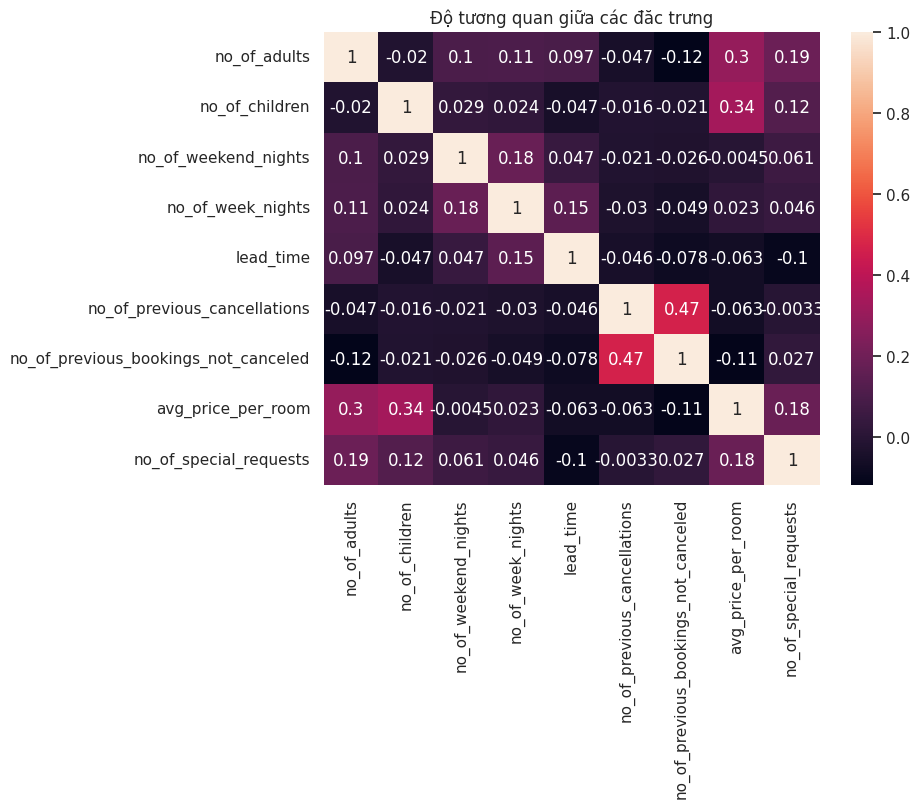

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)
corr_matrix = df[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Độ tương quan giữa các đăc trưng')
plt.show()

#### **<u>Nhận xét</u>**:
- Các đặt trưng ít có sự tương quan

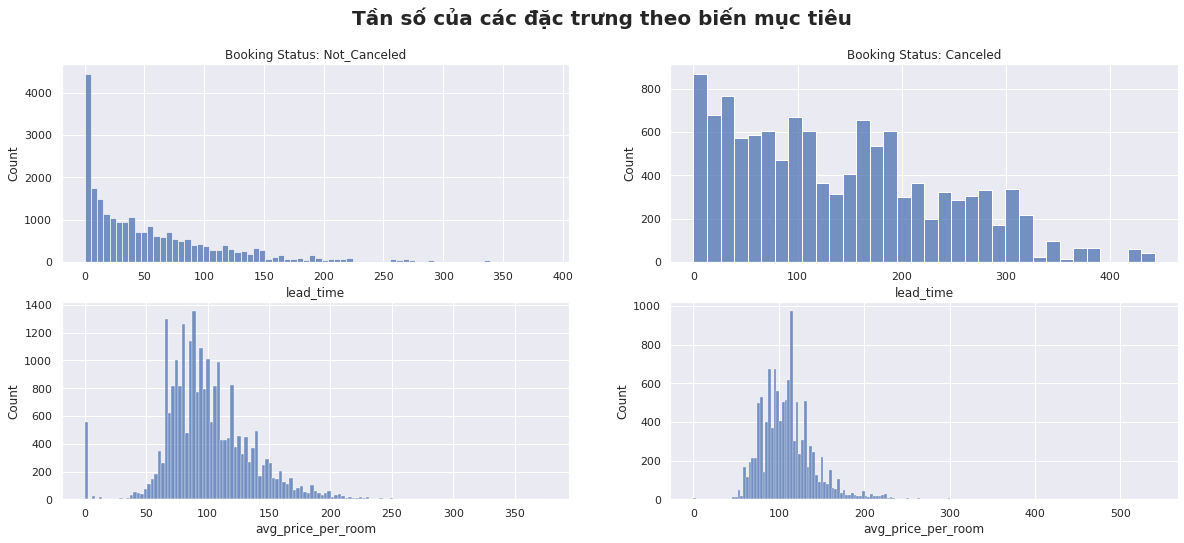

In [ ]:
plt.figure(figsize = (20,8))
sns.set(color_codes = True)
plt.suptitle("Tần số của các đặc trưng theo biến mục tiêu",fontweight="bold", fontsize=20)

plt.subplot(2,2,1)
plt.title("Booking Status: Not_Canceled")
sns.histplot(df_notCanceled['lead_time'], kde = False)

plt.subplot(2,2,2)
plt.title("Booking Status: Canceled")
sns.histplot(df_Canceled['lead_time'], kde = False)

plt.subplot(2,2,3)
sns.histplot(df_notCanceled['avg_price_per_room'], kde = False);

plt.subplot(2,2,4)
sns.histplot(df_Canceled['avg_price_per_room'], kde = False);

#### **<u>Nhận xét</u>**:
- Thời gian chờ có tần số giảm dần
- Giá phòng trung bình đa số vào khoảng 75->125 Euro
- Thời gian chờ càng lớn thì tỉ lệ khách hủy phòng càng cao
- Giá càng cao thì tỉ lệ khách hủy phòng càng cao

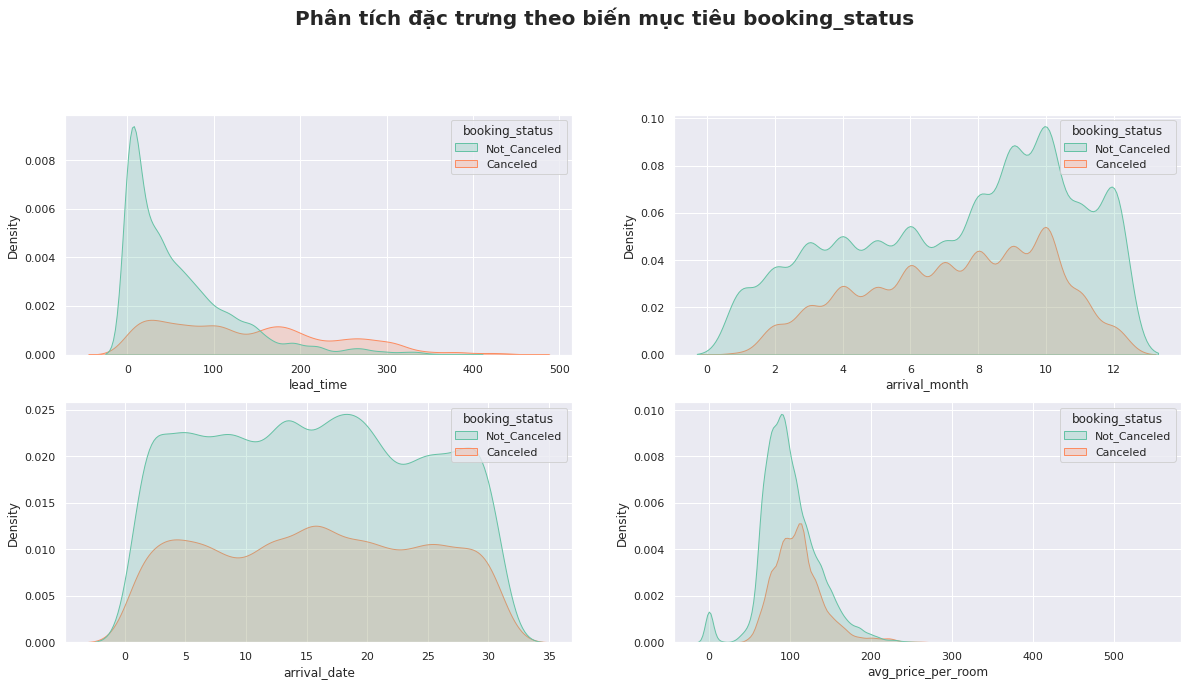

In [ ]:
plt.figure(figsize = (20, 15))
plt.suptitle("Phân tích đặc trưng theo biến mục tiêu booking_status",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(3,2,2)
sns.kdeplot(x='arrival_month', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(3,2,3)
sns.kdeplot(x='arrival_date', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(3,2,4)
sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'Set2', shade=True, data=df);

#### **<u>Nhận xét</u>**:
- Biểu đồ lead_time có trạng thái `Not_Canceled` lệnh mạnh về trái. Do đó khách đặt phòng có thời gian chờ càng thấp thì tỉ lệ không hủy phòng càng cao. Ngược lại nếu thời gian chờ càng lâu thì tỉ lệ hủy phòng càng cao.
- Mặc dù lượng đặt phòng tháng 11 và 12 giảm, nhưng nếu khách có đặt phòng thì tỉ lệ không hủy phòng sẽ cao hơn thường lệ.
- Trạng thái đặt phòng không phụ thuộc vào ngày đặt phòng vì hai đường khá tương đồng.
- Đa số giá phòng trung bình rẻ sẽ có tỉ lệ không hủy phòng cao hơn so với giá phòng cao hơn.


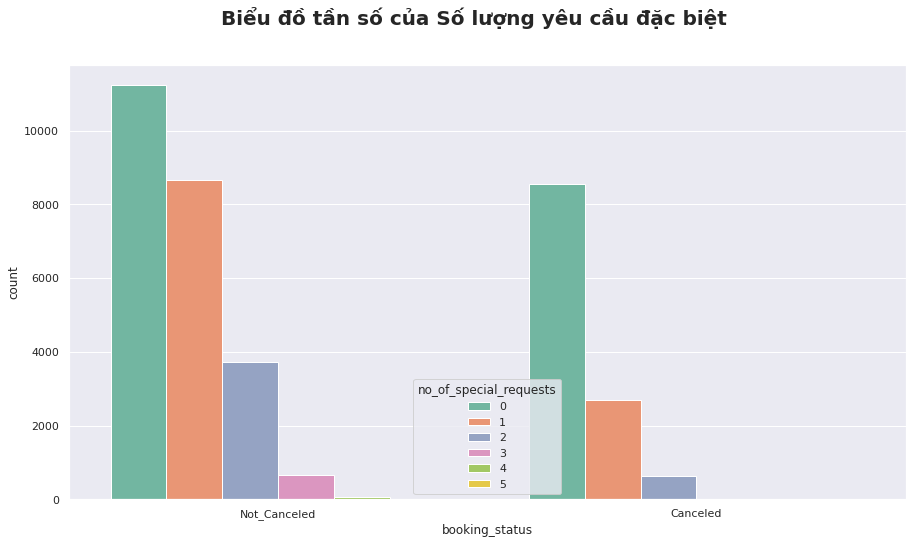

In [ ]:
plt.figure(figsize=(15,8))
plt.suptitle("Biểu đồ tần số của Số lượng yêu cầu đặc biệt",fontweight="bold", fontsize=20)
sns.countplot(x = 'booking_status', hue = 'no_of_special_requests', palette = 'Set2', data = df);

#### **<u>Nhận xét</u>**:
- Nếu số lượng yêu cầu đặt biệt của khách hàng càng cao thì tỉ lệ hủy phòng càng thấp.

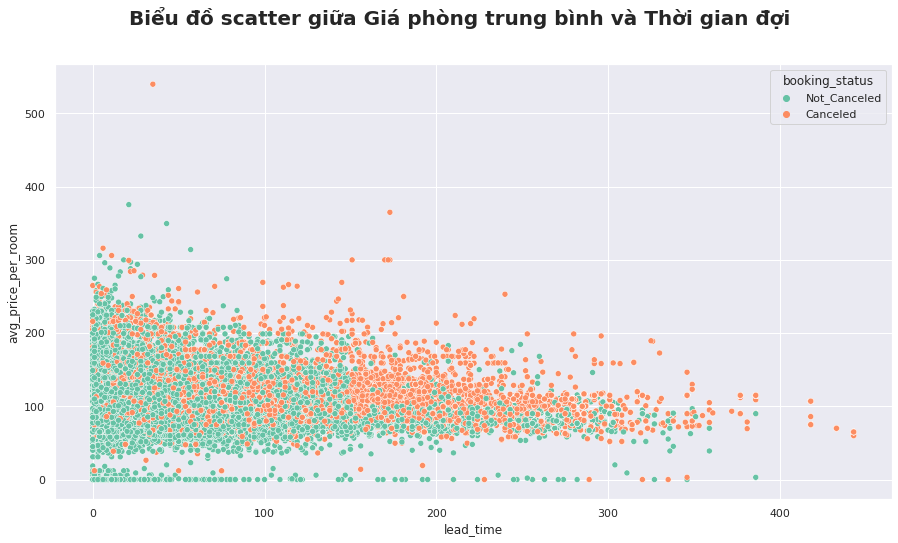

In [ ]:
plt.figure(figsize=(15,8))
plt.suptitle("Biểu đồ scatter giữa Giá phòng trung bình và Thời gian đợi",fontweight="bold", fontsize=20)
sns.scatterplot(data=df, x="lead_time", y="avg_price_per_room", palette = 'Set2', hue = 'booking_status');

#### **<u>Nhận xét</u>**:
- Nếu giá phòng lớn hơn 80 Euro và số ngày chờ lớn hơn 150 ngày thì tỉ lệ hủy phòng cực cao.